In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


In [2]:
mnist = fetch_openml('mnist_784',version=1,as_frame=False)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
mnist_df = pd.DataFrame(data=mnist.data,columns=mnist.feature_names)
mnist_df['label'] = mnist.target
mnist_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [5]:
mnist_df.shape

(70000, 785)

* Data has 784 features independent variables as it's refer to pictures pixels data suppose is 28*28 feature per one datapoint 
* data has one dependent variable 'label'

### Define features independent variables & label dependent variables

In [6]:
# extract label 
label = mnist_df['label']
label.head()

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: object

In [7]:
# extract features
d = mnist_df.drop('label',axis=1)
d.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
print(f'features shape: {d.shape},\nlabel shape: {label.shape}')

features shape: (70000, 784),
label shape: (70000,)


* each data point represent a number pictures & the data had ben flattened so to represent a one picture for a one datapoint we need to represnt the it as matrix 28px * 28px, so will reshape it into a matrix  

In [9]:
plt.figure(figsize=(7,7))
idx = 100
grid_data = d.iloc[100].to_numpy().reshape(28,28) # reshape the one data point to it's original matrix 28*28 from 1D to 2D
grid_data

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

<Figure size 504x504 with 0 Axes>

### show the data point for idx 100

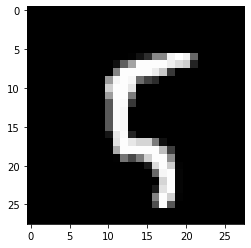

label is:5


In [10]:
plt.imshow(grid_data,interpolation=None,cmap='gray')
plt.show()
print(f'label is:{label[idx]}')

### create a function to plot any idx 

In [11]:
def show_digit(idx):
    plt.figure(figsize=(7,7))
    data_grid = d.iloc[idx].to_numpy().reshape(28,28)
    plt.imshow(data_grid,interpolation=None,cmap='gray')
    plt.show()
    print(f'data label is:{label[idx]}')

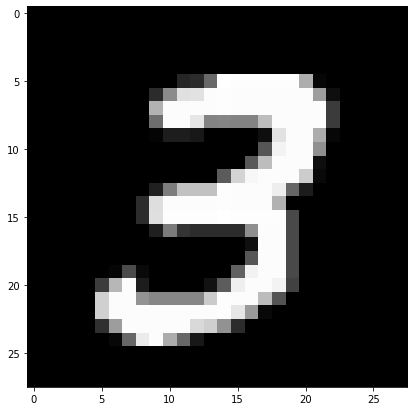

data label is:3


In [12]:
show_digit(7)

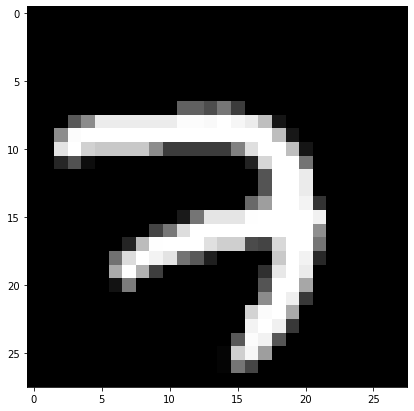

data label is:7


In [13]:
show_digit(5000)

In [14]:
scaler = StandardScaler()

In [15]:
scaled_d = scaler.fit_transform(d)
scaled_d.shape

(70000, 784)

In [16]:
data = scaled_d.copy()

# PCA Using SkLearn

In [17]:
pca = PCA(n_components=2)

In [18]:
pca_data = pca.fit_transform(data) # data was stamdardized before
print(f'pca_data shape: {pca_data.shape}')

pca_data shape: (70000, 2)


In [19]:
pca_data = np.vstack((pca_data.T,label)).T
print(f'pca_data shape: {pca_data.shape}')

pca_data shape: (70000, 3)


### explained variance ratio

In [20]:
pca.explained_variance_ratio_

array([0.05642719, 0.04041226])

## percentage of variance explained 

In [21]:
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
percentage_var_explained

array([0.58268805, 0.41731195])

In [22]:
var_explained_total = np.cumsum(percentage_var_explained)
var_explained_total

array([0.58268805, 1.        ])

## Create DataFrame for new Dataset

In [23]:
new_df = pd.DataFrame(data=pca_data,columns=['1pca','2pca','label'])
new_df.head()

,1pca,2pca,label
0,-0.891404,-4.9286,5
1,8.813495,-7.517861,0
2,2.204808,9.824564,4
3,-6.534678,-4.029873,1
4,-5.251702,3.278568,9


## Plot mnist on 2D

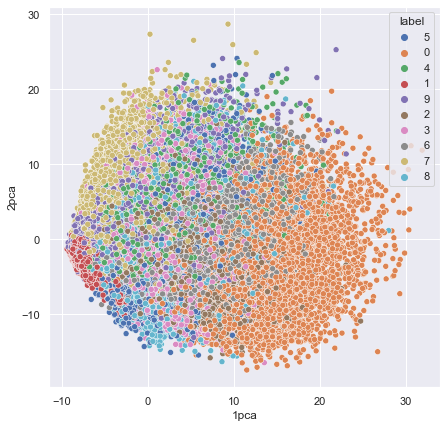

In [24]:
sns.set_theme(rc={'figure.figsize':[7,7]})
sns.scatterplot(data=new_df,x='1pca',y='2pca',hue='label')
plt.show()

* PCA in 2D Or maximum 3D is for visualization but we can use PCA For Dimensional reduction for other objective in ML

# PCA Using TSNE_SkLearn

In [26]:
tsne = TSNE(n_components=2,random_state=0)

In [27]:
tsne_data = tsne.fit_transform(data) # data standardized before

In [28]:
tsne_data = np.vstack((tsne_data.T,label)).T

In [29]:
tsne_df = pd.DataFrame(data=tsne_data,columns=['pca1','pca2','label'])

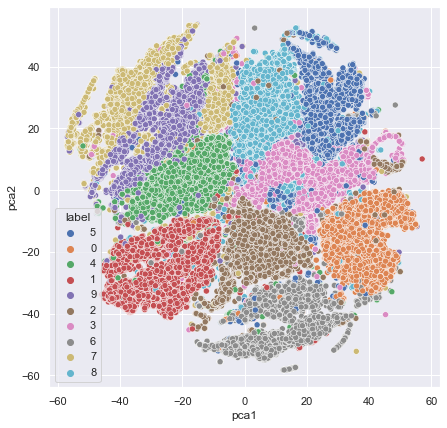

In [30]:
sns.scatterplot(data=tsne_df,x='pca1',y='pca2',hue='label')
plt.show()

In [38]:
def tsne(p,step):
    tsne = TSNE(n_components=2,random_state=0,perplexity=p,n_iter=step)
    tsne_data = tsne.fit_transform(data)
    tsne_data = np.vstack((tsne_data.T,label)).T
    tsne_df = pd.DataFrame(data=tsne_data,columns=['pca1','pca2','label'])
    sns.scatterplot(data=tsne_df,x='pca1',y='pca2',hue='label')
    print(f'perplexity:{p} , iteration:{step}')
    plt.show()

In [39]:
perplexity=[30,50,1000]
iteration=[1000,3000,5000]

perplexity:30 , iteration:1000


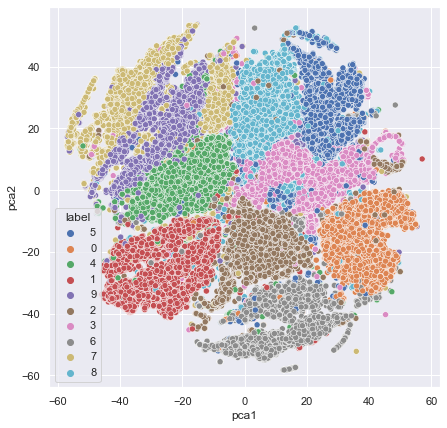

perplexity:30 , iteration:3000


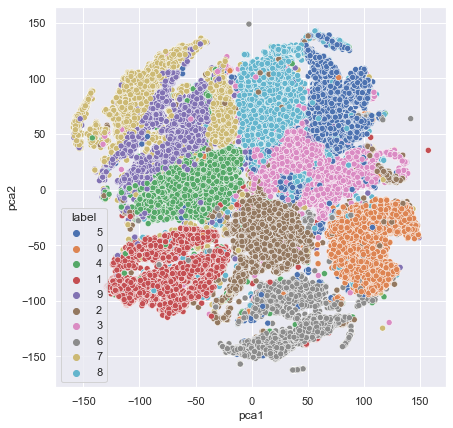

perplexity:30 , iteration:5000


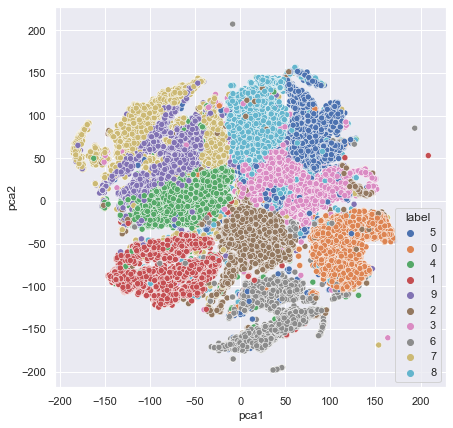

perplexity:50 , iteration:1000


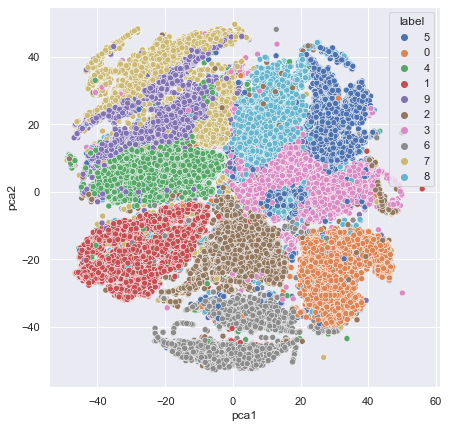

perplexity:50 , iteration:3000


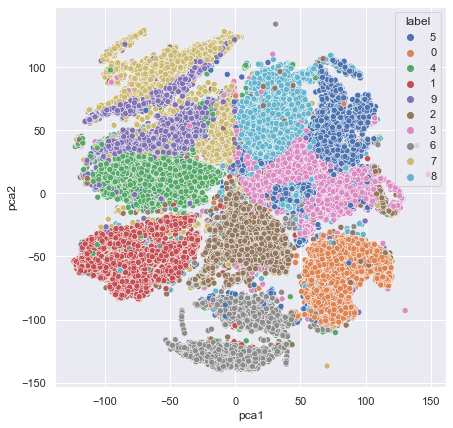

perplexity:50 , iteration:5000


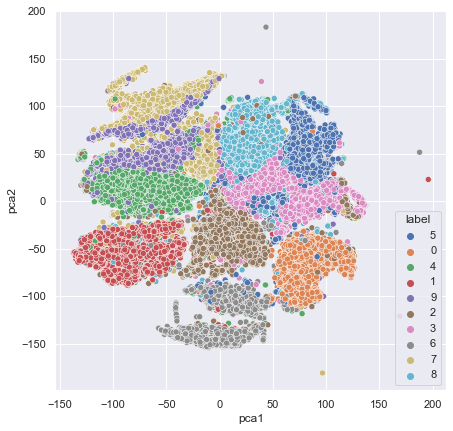

perplexity:1000 , iteration:1000


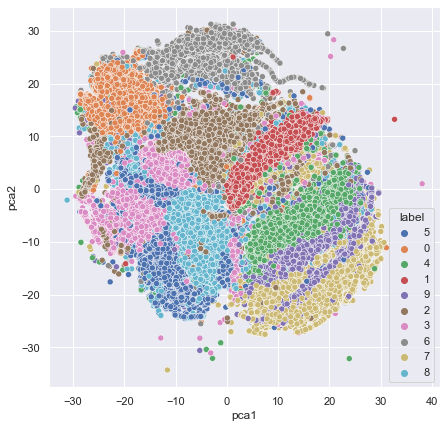

perplexity:1000 , iteration:3000


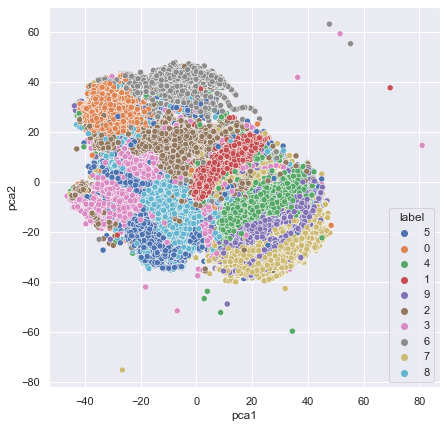

perplexity:1000 , iteration:5000


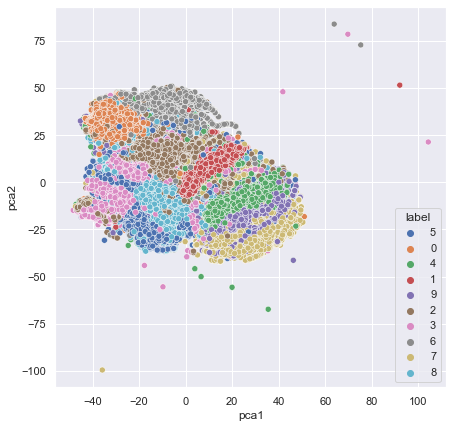

In [40]:
for p in perplexity:
    for i in iteration:
        tsne(p,i)